In [1]:
import matplotlib.pyplot as plt
import numpy as np

from impedance.models.circuits import CustomCircuit
from impedance import preprocessing

In [2]:
frequencies, Z = preprocessing.readCSV('exampleData.csv')

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

In [9]:
circuit = CustomCircuit(initial_guess=[.01, .005, .1, .005, .1, .001, 200], circuit='R_0-p(R_1,C_1)-p(R_1,C_1)-Wo_1')

circuit.fit(frequencies, Z)

print(circuit)

C:\Users\gagni\AppData\Roaming\Python\Python312\site-packages\impedance\models\circuits\elements.py:170: RuntimeWarning: overflow encountered in tanh
  Z = Z0 / (np.sqrt(1j * omega * tau) * np.tanh(np.sqrt(1j * omega * tau)))



Circuit string: R_0-p(R_1,C_1)-p(R_1,C_1)-Wo_1
Fit: True

Initial guesses:
    R_0 = 1.00e-02 [Ohm]
    R_1 = 5.00e-03 [Ohm]
    C_1 = 1.00e-01 [F]
    R_1 = 5.00e-03 [Ohm]
    C_1 = 1.00e-01 [F]
  Wo_1_0 = 1.00e-03 [Ohm]
  Wo_1_1 = 2.00e+02 [sec]

Fit parameters:
    R_0 = 1.65e-02  (+/- 1.54e-04) [Ohm]
    R_1 = 8.77e-03  (+/- 1.89e-04) [Ohm]
    C_1 = 3.28e+00  (+/- 1.85e-01) [F]
    R_1 = 5.31e-03  (+/- 2.06e-04) [Ohm]
    C_1 = 2.32e-01  (+/- 1.90e-02) [F]
  Wo_1_0 = 6.37e-02  (+/- 2.03e-03) [Ohm]
  Wo_1_1 = 2.37e+02  (+/- 1.72e+01) [sec]



In [10]:
circuit.plot(f_data=frequencies, Z_data=Z)

C:\Users\gagni\AppData\Roaming\Python\Python312\site-packages\impedance\visualization.py:171: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Z_df = pd.concat([Z_df, df], ignore_index=True)
c:\ProgramData\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_single' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
c:\ProgramData\anaconda3\Lib\site-packages\altair\vegalite\v5\api.py:362: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(me

alt.HConcatChart(...)

C:\Users\gagni\AppData\Roaming\Python\Python312\site-packages\impedance\visualization.py:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(np.real(Z), -np.imag(Z), fmt, **kwargs)
C:\Users\gagni\AppData\Roaming\Python\Python312\site-packages\impedance\visualization.py:39: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.
  ax.plot(np.real(Z), -np.imag(Z), fmt, **kwargs)
C:\Users\gagni\AppData\Roaming\Python\Python312\site-packages\impedance\models\circuits\elements.py:170: RuntimeWarning: overflow encountered in tanh
  Z = Z0 / (np.sqrt(1j * omega * tau) * np.tanh(np.sqrt(1j * omega * tau)))


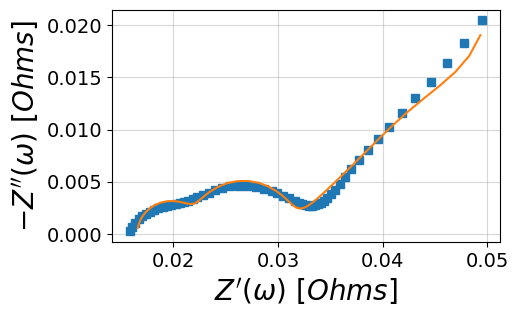

In [11]:
circuit.plot(f_data=frequencies, Z_data=Z, kind='nyquist')
plt.show()

C:\Users\gagni\AppData\Roaming\Python\Python312\site-packages\impedance\visualization.py:109: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax_mag.plot(f, np.abs(Z), fmt, **kwargs)
C:\Users\gagni\AppData\Roaming\Python\Python312\site-packages\impedance\visualization.py:109: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.
  ax_mag.plot(f, np.abs(Z), fmt, **kwargs)
C:\Users\gagni\AppData\Roaming\Python\Python312\site-packages\impedance\visualization.py:110: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax_phs.plot(f, -np.angle(Z, deg=True), fmt, **kwargs)
C:\Users\gagni\AppData\Roaming\Python\Python312\site-packages\impedance\visual

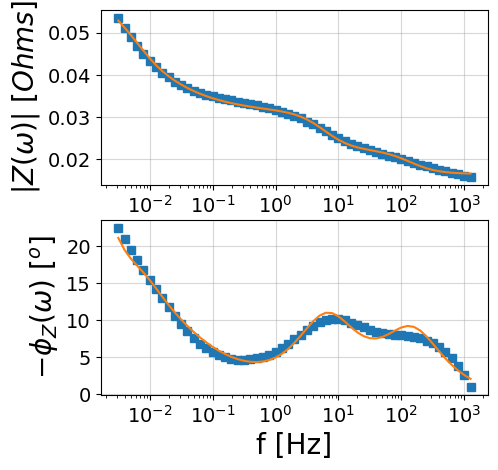

In [12]:
circuit.plot(f_data=frequencies, Z_data=Z, kind='bode')
plt.show()

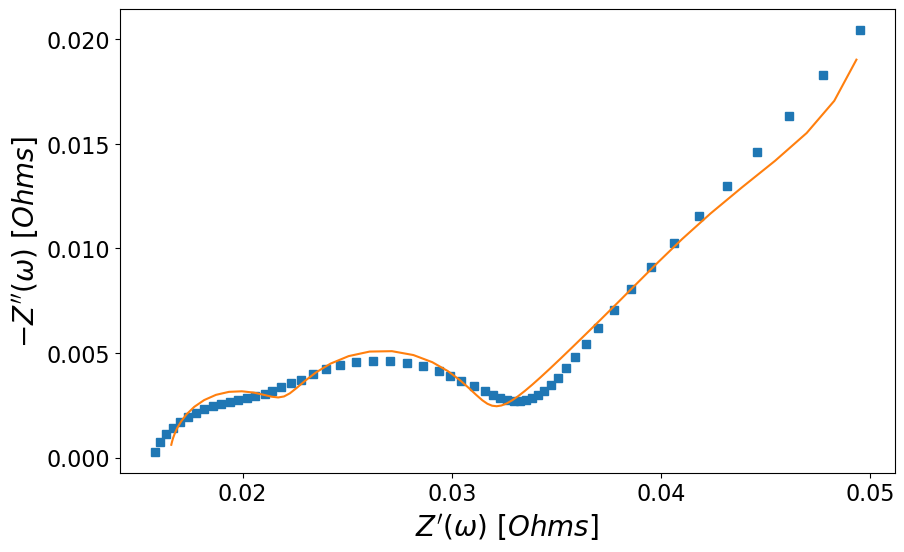

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax = circuit.plot(ax, frequencies, Z, kind='nyquist')

ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid(False)

plt.show()